# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [23]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

## plot the data

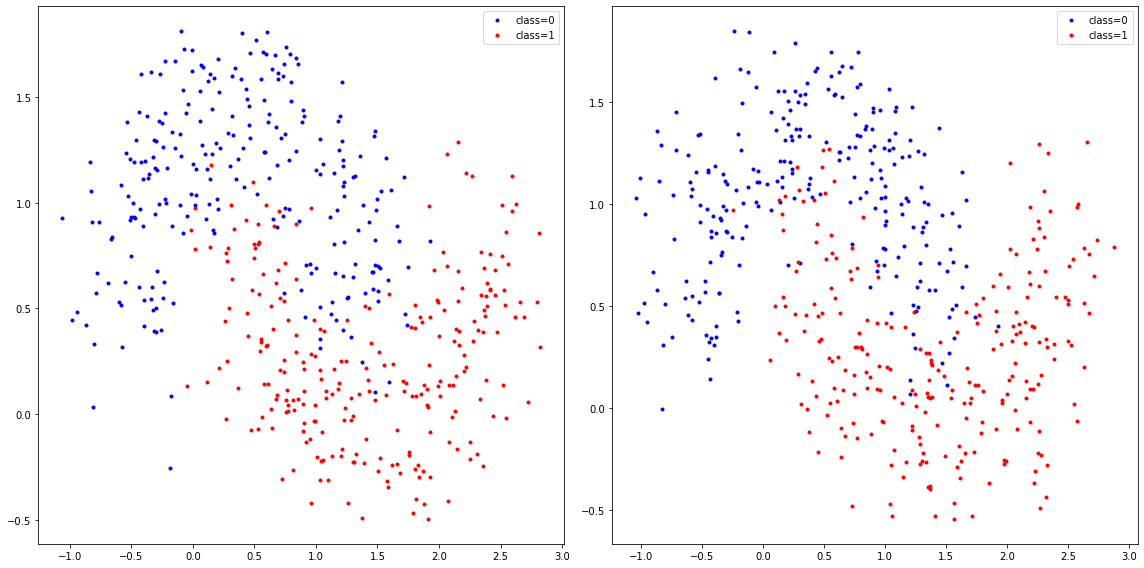

In [24]:
x1=data_train[:,0]
y1=data_train[:,1]
label_train=data_train[:,2]

x2=data_test[:,0]
y2=data_test[:,1]
label_test=data_test[:,2]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
for i in range(len(label_train)):
        if label_train[i]==1:
            break
plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
plt.legend()
plt.tight_layout()
plt.subplot(1,2,2)
for i in range(len(label_test)):
        if label_test[i]==1:
            break
plt.plot(x2[:i],y2[:i], 'b.', label='class=0')
plt.plot(x2[i:],y2[i:], 'r.', label='class=1')
plt.legend()
plt.tight_layout()
plt.show()


## define feature function

In [25]:
#15*n
def feature_function1(x, y):
    one=np.ones(len(x))
    feature = np.array(
        (one,x,y,x*y,x**2,y**2,x*y**2,x**2*y,x**3,y**3,x*y**3,x**2*y**2,x**3*y,x**4,y**4)).T
    return feature

## define regression function based on the feature function

In [26]:

def regression_function(theta, feature):
    value=np.matmul(feature,theta)
    return value

## define regularization function on the model parameters

In [27]:
def regularization_function(theta):
    value = np.sum(theta**2)
    value = value/2
    return value

## define sigmoid function

In [28]:
def logistic_function(x):
    z=1/(1+np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [29]:
def compute_loss_feature(theta, feature, label, alpha):
    h=logistic_function(regression_function(theta,feature))
    loss=-1*label*np.log(h+np.finfo(float).eps)-(1-label)*np.log(1-h+np.finfo(float).eps)
    loss=loss.sum()/(len(label))
    loss = loss + alpha * regularization_function(theta)
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [30]:
def compute_gradient_feature(theta, feature, label, alpha):
    h=logistic_function(regression_function(theta,feature))
    gradient=np.matmul(feature.T,(h-label))/ len(label)
    gradient = gradient + alpha * theta
    return gradient

## compute the accuracy

In [31]:
def compute_accuracy(theta, feature, label):
    h = logistic_function(regression_function(theta,feature))
    num_data = len(label)
    count=0
    for i in range(num_data):
        if h[i]>=0.5 and label[i] == 1:
            count+=1
        if h[i]<0.5 and label[i]==0:
            count+=1
    accuracy=count/num_data
    return accuracy


## gradient descent for the model parameters $\theta$

In [57]:
num_iteration   = 2000
learning_rate   = 0.1
alpha           = 0.001
feature1=feature_function1(x1,y1)
dim_feature=len(feature1[0])

feature1=feature_function1(x1,y1)
feature2=feature_function1(x2,y2)
theta1=np.zeros((dim_feature))



In [58]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [59]:
for i in range(num_iteration):
    theta1_final=theta1-learning_rate*compute_gradient_feature(theta1,feature1,label_train,alpha)
    loss1=compute_loss_feature(theta1,feature1,label_train,alpha)
    loss2=compute_loss_feature(theta1,feature2,label_test,alpha)
    accuracy_iteration_train[i]=compute_accuracy(theta1,feature1,label_train)
    accuracy_iteration_test[i]=compute_accuracy(theta1,feature2,label_test)
    theta_iteration[i]=theta1
    loss_iteration_train[i]=loss1
    loss_iteration_test[i]=loss2
    theta1=theta1_final
    if i%400==0:
        print("iteration = %4d, loss(train) = %5.5f, loss(test)= %5.5f, accuracy(train)= %5.5f , accuracy(test)= %5.5f"% (i, loss1,loss2, accuracy_iteration_train[i], accuracy_iteration_test[i]) )

theta_optimal=theta1_final
feature_train=feature_function1(x1,y1)
feature_test=feature_function1(x2,y2)

iteration =    0, loss(train) = 0.69315, loss(test)= 0.69315, accuracy(train)= 0.50000 , accuracy(test)= 0.50000
iteration =  400, loss(train) = 0.28151, loss(test)= 0.30152, accuracy(train)= 0.87800 , accuracy(test)= 0.88600
iteration =  800, loss(train) = 0.25213, loss(test)= 0.26993, accuracy(train)= 0.89400 , accuracy(test)= 0.90600
iteration = 1200, loss(train) = 0.23601, loss(test)= 0.25285, accuracy(train)= 0.90800 , accuracy(test)= 0.91000
iteration = 1600, loss(train) = 0.22627, loss(test)= 0.24256, accuracy(train)= 0.91800 , accuracy(test)= 0.91800


## compute accuracy of the classifiers

In [60]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)
print(accuracy_train,accuracy_test)

0.922 0.92


## plot the results

In [61]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(range(len(loss_iteration_train)), loss_iteration_train, 'r-', label='train')
    plt.plot(range(len(loss_iteration_test)),loss_iteration_test,'b-', label='test')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.legend()
    plt.show()

In [62]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')

    plt.plot(range(len(accuracy_iteration_train)), accuracy_iteration_train, 'r-', label='train')
    plt.plot(range(len(accuracy_iteration_test)),accuracy_iteration_test,'b-', label='test')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.legend()
    plt.show()

In [63]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    x1=data_train[:,0]
    y1=data_train[:,1]
    label_train=data_train[:,2]

    x2=data_test[:,0]
    y2=data_test[:,1]
    label_test=data_test[:,2]

    plt.subplot(1,2,1)
    for i in range(len(label_train)):
            if label_train[i]==1:
                break
    plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
    plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
    plt.legend()
    plt.tight_layout()
    plt.subplot(1,2,2)
    for i in range(len(label_test)):
            if label_test[i]==1:
                break
    plt.plot(x2[:i],y2[:i], 'b.', label='class=0')
    plt.plot(x2[i:],y2[i:], 'r.', label='class=1')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [64]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
   
    plt.title('model parameter')
    
    
    for i in range(theta_iteration.T.shape[0]):
        rgb=(np.random.rand(),np.random.rand(),np.random.rand())
        plt.plot(theta_iteration.T[i], color=rgb, label='$\\theta_{%d}$' %i)
    plt.xlabel('iteration')
    plt.legend(loc='right')
    plt.tight_layout()
    plt.show()

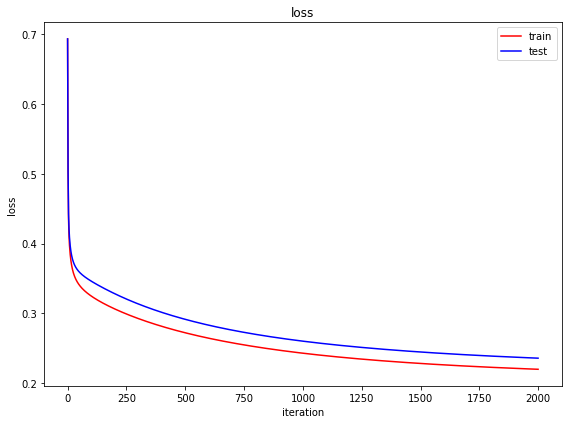

In [65]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

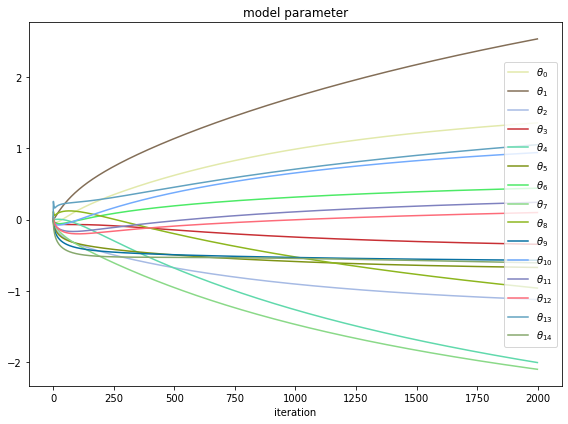

In [66]:
plot_model_parameter(theta_iteration)

In [67]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    xx=np.arange(-1.5,3,0.1)
    yy=np.arange(-1,2.5,0.1)
    X,Y=np.meshgrid(xx,yy)
    
    ZZ=theta[0]+theta[1]*X+theta[2]*Y+theta[3]*X*Y+theta[4]*X**2+theta[5]*Y**2+theta[6]*X*Y**2+theta[7]*X**2*Y+theta[8]*X**3+theta[9]*Y**3+theta[10]*X*Y**3+theta[11]*X**2*Y**2+theta[12]*X**3*Y+theta[13]*X**4+theta[14]*Y**4
    x1=data[:,0]
    y1=data[:,1]
    label1=data[:,2]
    for i in range(len(label1)):
        if label1[i]==1:
            break
    norm1=colors.TwoSlopeNorm(vmin=ZZ.min(), vcenter=0, vmax=ZZ.max())
    plt.contourf(X,Y,ZZ,levels=len(xx)*10,norm=norm1,cmap='RdBu_r' )
    plt.colorbar()
    plt.contour(X,Y,ZZ,'b-', levels=[0])
    plt.plot(x1[:i],y1[:i], 'b.', label='class=0')
    plt.plot(x1[i:],y1[i:], 'r.', label='class=1')
    plt.legend(loc='upper right')
    
    
    plt.tight_layout()
  
    plt.show()

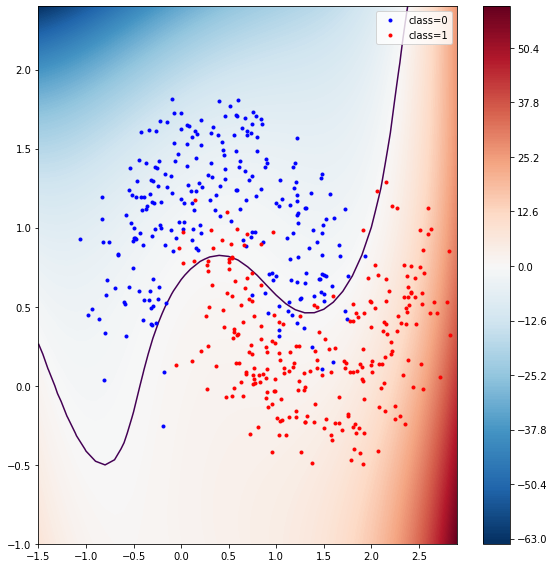

In [68]:
plot_classifier(data_train, theta_optimal)

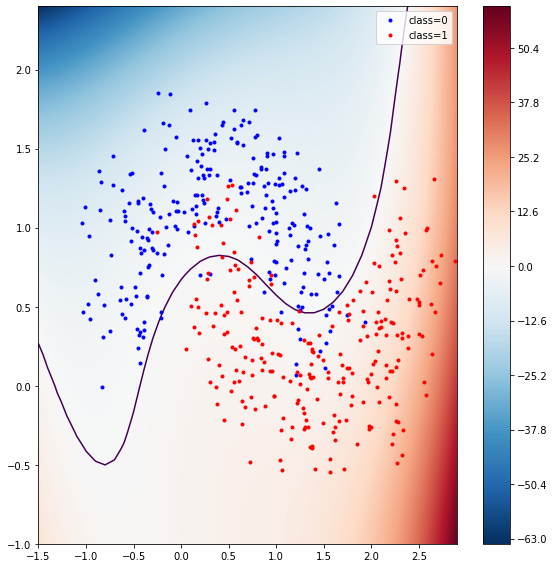

In [69]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

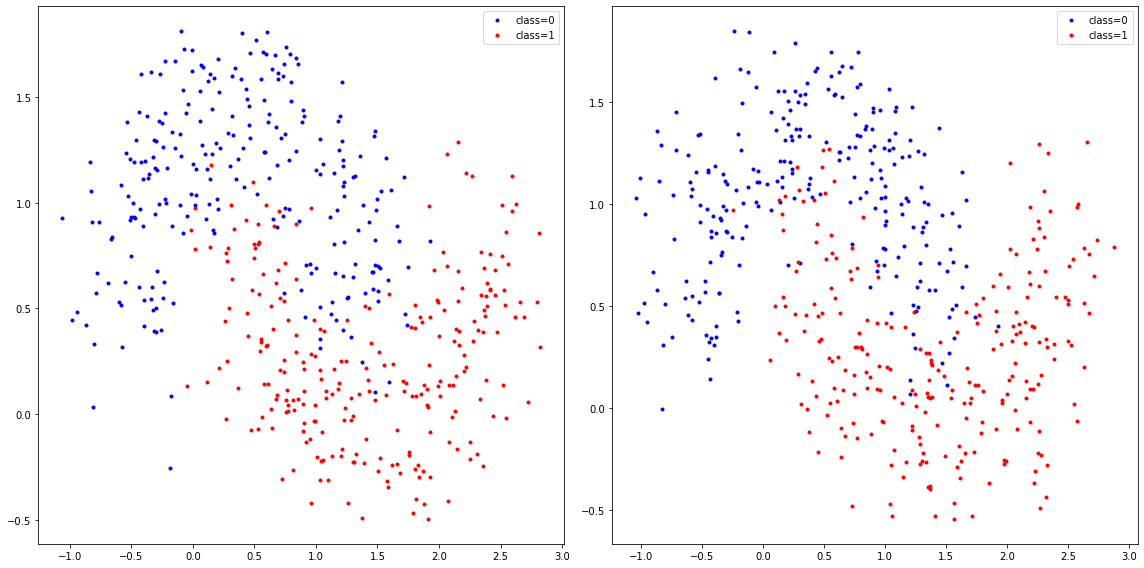

In [42]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

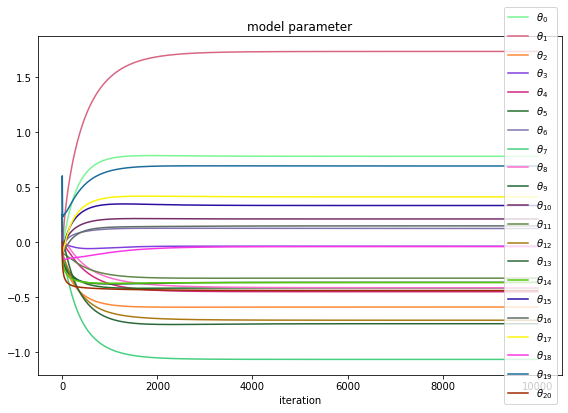

In [64]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

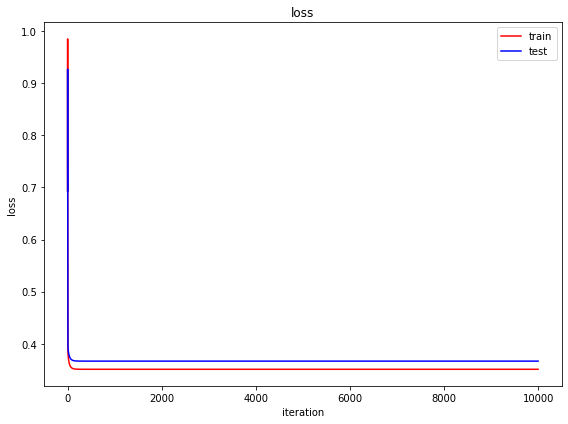

In [44]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

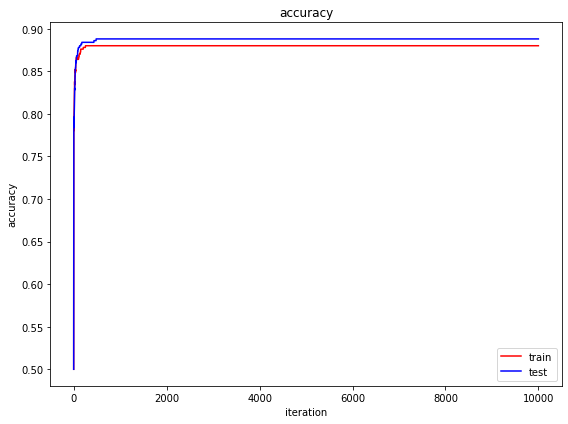

In [45]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

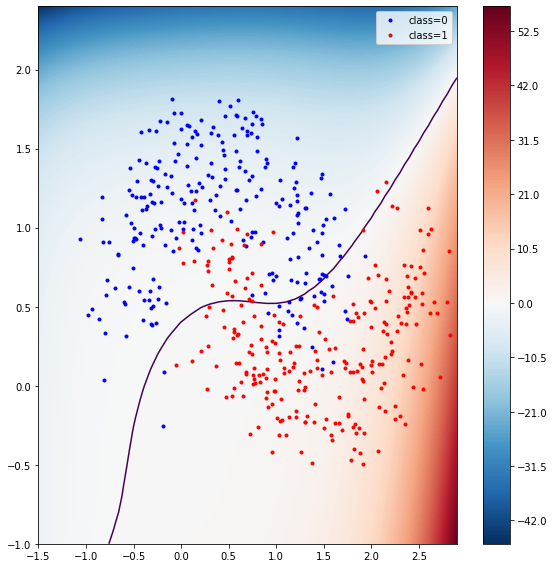

In [46]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

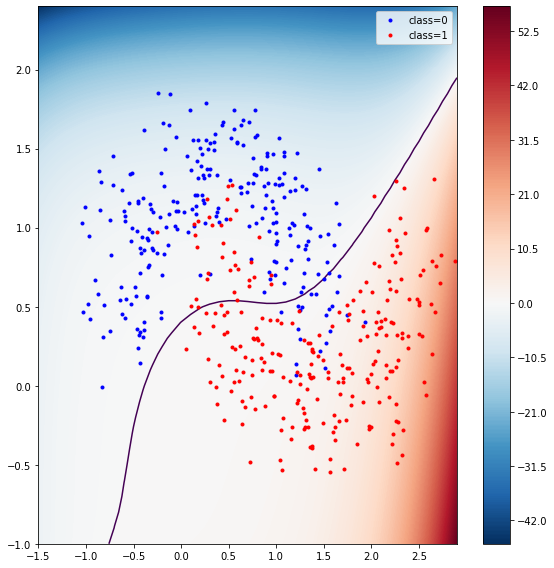

In [47]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [48]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): 0.88
accuracy(test) : 0.888
